In [1]:
import warnings
warnings.filterwarnings("ignore")

# Import pandas
import pandas as pd
import numpy as np

np.random.seed(42)

# Load Titanic data from a GitHub URL
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Print dataset shape
print(df.shape)

# Show first 3 rows
print(df.head(3))

(891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  


## Exploring DataFrame
- What columns do you see
- How many rows are there
- how might this data be useful to predict

In [2]:
# Summarize dataset
print(df.describe(include='all'))   
print(df.info())
print(df.nunique())


        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare 

In [4]:
# Preview values in single column
print(df['Sex'].head()) 
print(df['Cabin'].value_counts())

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object
Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64


In [6]:
# Clean missing values
print(df.isnull().sum())
df = df.dropna(subset=['Age'])
print('Rows after dropping missing/NA in Age:', df.shape[0])

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Rows after dropping missing/NA in Age: 714


In [7]:
# Create a new column: Age bucket
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 30, 50, 100], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
print(df[['Age', 'AgeGroup']].head(6))

    Age     AgeGroup
0  22.0  Young Adult
1  38.0        Adult
2  26.0  Young Adult
3  35.0        Adult
4  35.0        Adult
6  54.0       Senior


# pd.cut command

Age ranges:   0-12   12-18   18-30   30-50   50-100

Labels:      Child   Teen    Young   Adult   Senior
              ↓       ↓       ↓       ↓       ↓

Examples:     5       15      25      42      67

In [9]:
# Filter: Only adults females
adult = df[(df['Sex'] == 'female') & (df['Age'] >= 18)]
print(adult[['Name', 'Age','Sex']].head(3))


                                                Name   Age     Sex
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0  female
2                             Heikkinen, Miss. Laina  26.0  female
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0  female


In [ ]:
# Group by: survival rate by Age Group
survival_rate = df.groupby('AgeGroup')['Survived'].mean()   
print(survival_rate)

AgeGroup
Child          0.579710
Teen           0.428571
Young Adult    0.355556
Adult          0.423237
Senior         0.343750
Name: Survived, dtype: float64


In [11]:
# Merge: add a family size column from external list
family_sizes = df[['Name', 'SibSp', 'Parch']].copy()
family_sizes['FamilySize'] = family_sizes['SibSp'] + family_sizes['Parch'] + 1
df = pd.merge(df, family_sizes[['Name', 'FamilySize']], on='Name', how='left')
print(df[['Name', 'FamilySize']].head(3))

                                                Name  FamilySize
0                            Braund, Mr. Owen Harris           2
1  Cumings, Mrs. John Bradley (Florence Briggs Th...           2
2                             Heikkinen, Miss. Laina           1


In [12]:
# Find the largest family size
max_family_size = df['FamilySize'].max()    
print('Largest family size on board:', max_family_size)

Largest family size on board: 8


In [13]:
# Pivot Table: Survival by class and sex
pivot = df.pivot_table(values='Survived', index='Pclass', columns='Sex', aggfunc='mean')
print(pivot)

Sex       female      male
Pclass                    
1       0.964706  0.396040
2       0.918919  0.151515
3       0.460784  0.150198


<Axes: title={'center': 'Total Airline Passengers by Month'}, xlabel='month'>

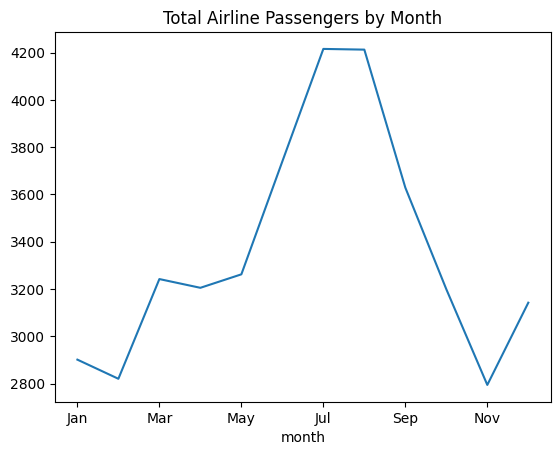

In [14]:
# Simple time series example using flights data
import seaborn as sns
flights = sns.load_dataset('flights')
monthly = flights.groupby('month')['passengers'].sum()
monthly.plot(kind='line', title='Total Airline Passengers by Month')

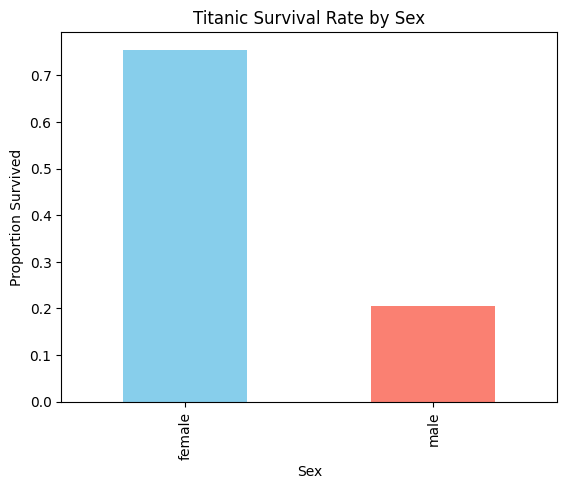

In [15]:
# Visualize Titanic survival by Sex
import matplotlib.pyplot as plt

df['Survived'].groupby(df['Sex']).mean().plot(kind='bar', color=['skyblue', 'salmon'])
plt.ylabel('Proportion Survived')
plt.title('Titanic Survival Rate by Sex')
plt.show()

In [16]:
# Mini-Project: Quick EDA on Titanic Dataset
print('Average fare by survival:', df.groupby('Survived')['Fare'].mean())
print('Median age by class:', df.groupby('Pclass')['Age'].median())
print('Port of Embarkation counts:')
print(df['Embarked'].value_counts(dropna=False))

Average fare by survival: Survived
0    22.965456
1    51.843205
Name: Fare, dtype: float64
Median age by class: Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64
Port of Embarkation counts:
Embarked
S      554
C      130
Q       28
NaN      2
Name: count, dtype: int64


In [17]:
# Mini-Project: Feature engineering and correlation
df['FarePerPerson'] = df['Fare'] / df['FamilySize']
print(df[['Fare', 'FamilySize', 'FarePerPerson']].head(3))
print('Correlation with survival:')
print(df[['Survived', 'Fare', 'Age', 'FamilySize']].corr())

      Fare  FamilySize  FarePerPerson
0   7.2500           2        3.62500
1  71.2833           2       35.64165
2   7.9250           1        7.92500
Correlation with survival:
            Survived      Fare       Age  FamilySize
Survived    1.000000  0.268189 -0.077221    0.042787
Fare        0.268189  1.000000  0.096067    0.204640
Age        -0.077221  0.096067  1.000000   -0.301914
FamilySize  0.042787  0.204640 -0.301914    1.000000


In [18]:
# Pandas best practices and performance tips
pd.set_option('display.max_columns', 20)
sample = df.sample(n=100, random_state=42)
print(sample.head(3))

     PassengerId  Survived  Pclass  \
120          150         0       2   
329          408         1       2   
39            54         1       2   

                                                  Name     Sex   Age  SibSp  \
120                  Byles, Rev. Thomas Roussel Davids    male  42.0      0   
329                     Richards, Master. William Rowe    male   3.0      1   
39   Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...  female  29.0      1   

     Parch  Ticket   Fare Cabin Embarked     AgeGroup  FamilySize  \
120      0  244310  13.00   NaN        S        Adult           1   
329      1   29106  18.75   NaN        S        Child           3   
39       0    2926  26.00   NaN        S  Young Adult           2   

     FarePerPerson  
120          13.00  
329           6.25  
39           13.00  


In [19]:
# Common pandas errors and how to fix them
try:
    print(df['FakeColumn'].head())
except Exception as e:
    print('Error:', str(e))
    print('Tip: Check your spelling, or use df.columns to see valid names!')

Error: 'FakeColumn'
Tip: Check your spelling, or use df.columns to see valid names!


In [22]:
# Challenge: User filters by AgeGroup
group = input('Choose an AgeGroup to inspect (e.g. Child, Teen, Adult): ')
filtered = df[df['AgeGroup'] == group]
print(filtered[['Name', 'Age', 'Survived']].head())

                                                 Name   Age  Survived
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0         1
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0         1
4                            Allen, Mr. William Henry  35.0         0
12                        Andersson, Mr. Anders Johan  39.0         0
16  Vander Planke, Mrs. Julius (Emelia Maria Vande...  31.0         0


# Quick Recap

You have installed pandas, loaded a real dataset, and practiced data cleaning, transforming, groupby, joining, pivoting, and visualization.

You even explored basic error handling and user interaction.

With these core tools, you are ready to go further in data science!